### PROJECT ID : PRCP-1025-Flight_Fare_Prediction
### TEAM ID : PTID-CDS-NOV21-1406
### TEAM MEMBERS
1) SUNIL ZAKANE  <br>
2) VEDANT DESHPANDE  <br>
3) PRAJWAL PATIL  <br>
4) VISHAL HOSAMANI  <br>

#### PROBLEM STATEMENT :
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable.That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.






### STEPS TO PREDICT THE ALGORITHAMS

## Importing libraries

In [76]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### READING THE  DATASET

In [77]:
df=pd.read_excel('Flight_Fare.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302




### FEATURES: 
#### Airline: The name of the airline.

#### Date_of_Journey: The date of the journey

#### Source: The source from which the service begins.

#### Destination: The destination where the service ends.

#### Route: The route taken by the flight to reach the destination.

#### Dep_Time: The time when the journey starts from the source.

#### Arrival_Time: Time of arrival at the destination.

#### Duration: Total duration of the flight.

#### Total_Stops: Total stops between the source and destination.

#### Additional_Info: Additional information about the flight

#### Price: The price of the ticket


In [78]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [79]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [80]:
df.shape

(10683, 11)

In [81]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [83]:
 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### The columns 'Total_stops' and 'Route' has as one null value each which needs to be handled

In [84]:
a = df.isna().any()
na_col = a[a].index
na_col

Index(['Route', 'Total_Stops'], dtype='object')

In [85]:
df.dropna(inplace = True) 

### Handling Duplicates rows

In [86]:
df.duplicated().sum()

220

### There are 220 rows which are duplicates.

In [87]:
df.drop_duplicates(inplace=True) 

In [88]:
df.dtypes # datatypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### FEATURE ENGINEERING


In [89]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:>

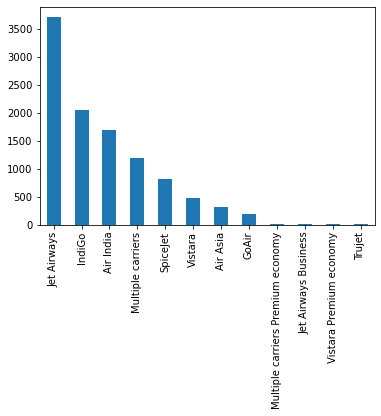

In [90]:
print(df['Airline'].value_counts())
df['Airline'].value_counts().plot(kind = 'bar') 

### jet Airways , indiGO , Air Inida are the top airlines which passengers prefer.

In [91]:
airlines_with_very_less_data= (df['Airline'].value_counts() < 14)
l = airlines_with_very_less_data[airlines_with_very_less_data].index 
l

Index(['Multiple carriers Premium economy', 'Jet Airways Business',
       'Vistara Premium economy', 'Trujet'],
      dtype='object')

### These are the airlines which data are very less compare to other airlines. Multiple carriers Premium economy, Jet Airways Business, Vistara Premium economy, Trujet

In [92]:
#converting string dtype to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [93]:
df['Date_of_Journey'].dt.year.value_counts()

2019    10462
Name: Date_of_Journey, dtype: int64

### we have only 2019 data

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:>

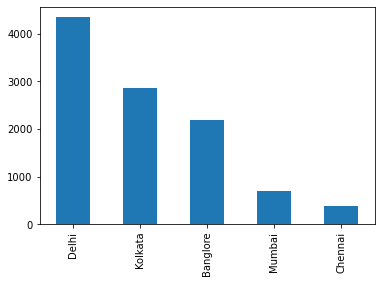

In [94]:
print(df['Source'] .value_counts())
df['Source'].value_counts().plot(kind = 'bar')

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:>

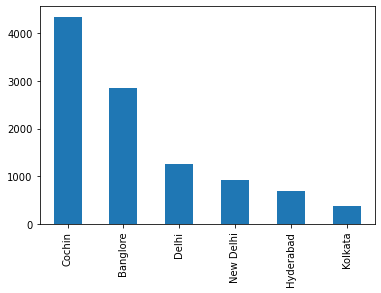

In [95]:
print(df['Destination'] .value_counts())
df['Destination'].value_counts().plot(kind = 'bar') 

### From the above bar graph we have to destination delhi , new delhi. but in source only delhi is there so we will replace NewDelhi to Delhi.

<AxesSubplot:>

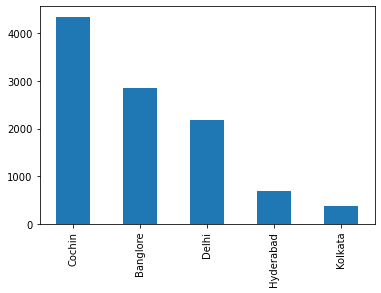

In [96]:
df['Destination'] = df['Destination'].replace('New Delhi' , 'Delhi')
df['Destination'].value_counts().plot(kind = 'bar') 


In [97]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

### There are total 128 different routes.

In [98]:
print(df['Total_Stops'].value_counts())

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64


### there are total 5 kind of stops but we have only one data for 4 stops so remove that.

In [99]:
df = df[df['Total_Stops']!='4 stops']

<AxesSubplot:>

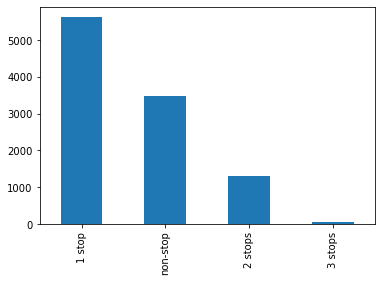

In [100]:
df['Total_Stops'].value_counts().plot(kind = 'bar') 

<AxesSubplot:>

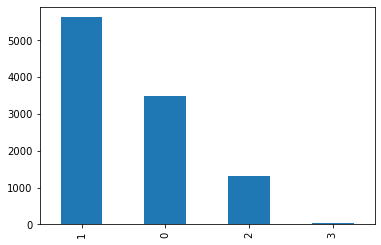

In [101]:
df['Total_Stops'] = df['Total_Stops'].str[0].replace('n' , 0).astype('int32')
df['Total_Stops'].value_counts().plot(kind = 'bar')

### Replacing 1stops = 1 , 2stops= 2 , 3stops = 3 , non-stops = 0

<AxesSubplot:>

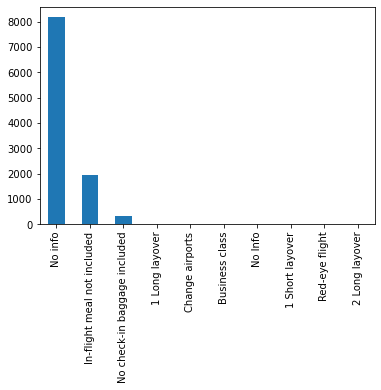

In [102]:
df['Additional_Info'].value_counts().plot(kind = 'bar') 

In [103]:
df['Dep_Time' ][0:5] 

0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object

In [104]:
# Extracting departure hours and departure minutes 
df['dep_hour' ] = df['Dep_Time'].str.split(':' , expand = True)[0].astype('int32')
df['dep_min']  =  df['Dep_Time'].str.split(':' , expand = True)[1].astype('int32')


In [105]:

df['Arrival_Time'][0:5] 

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [106]:
# Extracting arrival hours and arrival minutes 
 
df['arrival_hour'] = df['Arrival_Time'].str[0:5].str.split(':' , expand = True)[0].astype('int32')
df['arrival_min']  = df['Arrival_Time'].str[0:5].str.split(':' , expand = True)[1].astype('int32') 

In [107]:
# Extracting Duration hours and duration minutes 

df['Duration_hour' ] = df['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[0].fillna(0).astype('int32')
df['Duration_min' ] = df['Duration'].str.replace('h','').str.replace('m' , '').str[0: ].str.split(' ' , expand = True )[1].fillna(0).astype('int32')

In [108]:
#calculation total duration hours 
df['total_hours'] = df['Duration_hour'] + df['Duration_min'] / 60 

# EDA

In [109]:
df.columns 

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'dep_hour', 'dep_min', 'arrival_hour',
       'arrival_min', 'Duration_hour', 'Duration_min', 'total_hours'],
      dtype='object')

In [110]:
import plotly.express as px

In [111]:
px.histogram(df , x = 'Airline' , color = 'Airline' , title = 'No. of airlines')

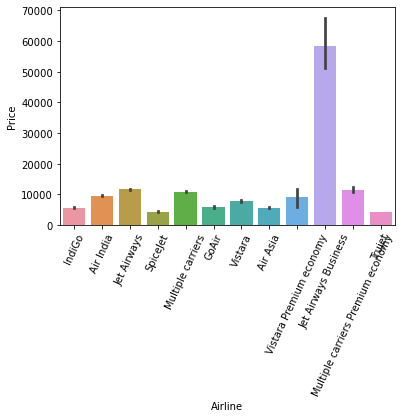

In [112]:
sns.barplot(x = 'Airline' , y = 'Price'  , data = df )  
plt.xticks(rotation = 65) 
plt.show() 

In [113]:
px.box(df , x = 'Source' , y = 'Price' , color = 'Source')

In [114]:
px.box(df , x = 'Airline' , y = 'Price' , color = 'Airline')

### From graph we can see that Jet Airways Business have the highest Price, Apart from the Jet Airways Business almost all are having similar median

In [115]:
df_blr_del = df[df['Route']=='BLR → DEL']

### Lets analyse flight fare price for banglore to delhi with different airline.

Airline
Vistara Premium economy    8881.000000
Air India                  6716.757962
Jet Airways                6498.803150
Vistara                    5960.674286
IndiGo                     5023.526427
GoAir                      4767.033708
Air Asia                   4574.280899
SpiceJet                   4289.847059
Name: Price, dtype: float64


<AxesSubplot:xlabel='Airline'>

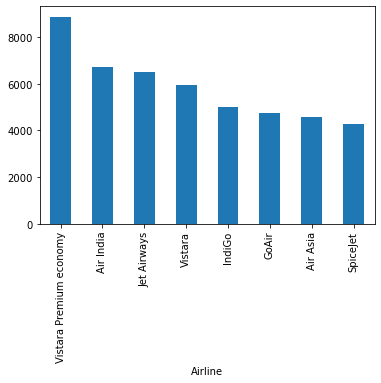

In [116]:
print(df_blr_del.groupby('Airline')['Price'].mean().sort_values(ascending = False)  )
df_blr_del.groupby('Airline')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar')

### Vistara premium economy airline fare price is quite high comparing with other airlines.
### SpiceJet fare is very cheap.
### BLG->DEL average fare is almost 6500+




<AxesSubplot:xlabel='total_hours', ylabel='Price'>

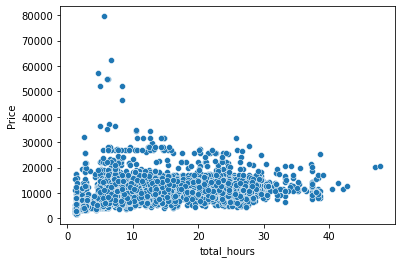

In [117]:
sns.scatterplot(x = 'total_hours' , y = 'Price' , data = df) 

## Outliers

<AxesSubplot:ylabel='Density'>

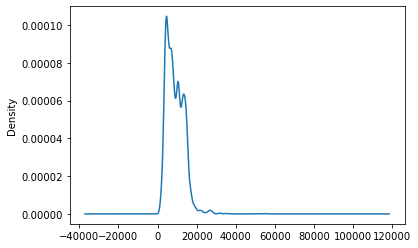

In [118]:
df['Price'].plot(kind = 'kde') 

<AxesSubplot:xlabel='Price'>

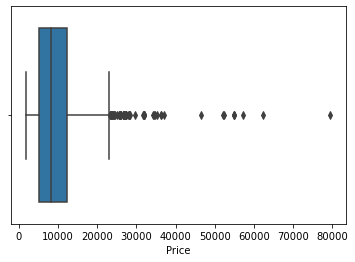

In [119]:
sns.boxplot(x = 'Price' , data = df) 

In [120]:
df.describe() 

,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hour,Duration_min,total_hours
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.00000,10461.000000
mean,0.802027,9025.962527,12.479208,24.402543,13.387917,24.720390,10.024854,28.20954,10.495013
std,0.659900,4624.295514,5.727034,18.814954,6.855835,16.571178,8.375939,16.88071,8.342866
min,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.250000
25%,0.000000,5224.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.00000,2.833333
50%,1.000000,8266.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.00000,8.416667
75%,1.000000,12341.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.00000,15.166667
max,3.000000,79512.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.00000,47.666667


In [121]:
df['Price'] = np.where(df['Price']>40000 , df['Price'].median() , df['Price'])

In [122]:
df['month'] = df['Date_of_Journey'].dt.month
df['date']  =df['Date_of_Journey'].dt.day  


In [123]:
cols = ['Date_of_Journey' , 'Route' , 'Dep_Time' , 'Arrival_Time' , 'Duration' , 'Additional_Info' , 'Duration_hour' , 'Duration_min']
final_df = df.drop(columns=cols , axis = True )
final_df.head()

,Airline,Source,Destination,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,total_hours,month,date
0,IndiGo,Banglore,Delhi,0,3897.0,22,20,1,10,2.833333,3,24
1,Air India,Kolkata,Banglore,2,7662.0,5,50,13,15,7.416667,1,5
2,Jet Airways,Delhi,Cochin,2,13882.0,9,25,4,25,19.000000,9,6
3,IndiGo,Kolkata,Banglore,1,6218.0,18,5,23,30,5.416667,12,5
4,IndiGo,Banglore,Delhi,1,13302.0,16,50,21,35,4.750000,1,3


In [124]:
final_df = pd.get_dummies(final_df , drop_first=True)

In [125]:
final_df.head()

,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,total_hours,month,date,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897.0,22,20,1,10,2.833333,3,24,0,...,0,0,0,0,0,0,0,1,0,0
1,2,7662.0,5,50,13,15,7.416667,1,5,1,...,0,0,0,0,1,0,0,0,0,0
2,2,13882.0,9,25,4,25,19.000000,9,6,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218.0,18,5,23,30,5.416667,12,5,0,...,0,0,0,0,1,0,0,0,0,0
4,1,13302.0,16,50,21,35,4.750000,1,3,0,...,0,0,0,0,0,0,0,1,0,0


## Correlation

In [126]:

final_df.head()

,Total_Stops,Price,dep_hour,dep_min,arrival_hour,arrival_min,total_hours,month,date,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897.0,22,20,1,10,2.833333,3,24,0,...,0,0,0,0,0,0,0,1,0,0
1,2,7662.0,5,50,13,15,7.416667,1,5,1,...,0,0,0,0,1,0,0,0,0,0
2,2,13882.0,9,25,4,25,19.000000,9,6,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218.0,18,5,23,30,5.416667,12,5,0,...,0,0,0,0,1,0,0,0,0,0
4,1,13302.0,16,50,21,35,4.750000,1,3,0,...,0,0,0,0,0,0,0,1,0,0



## Heatmap

<AxesSubplot:>

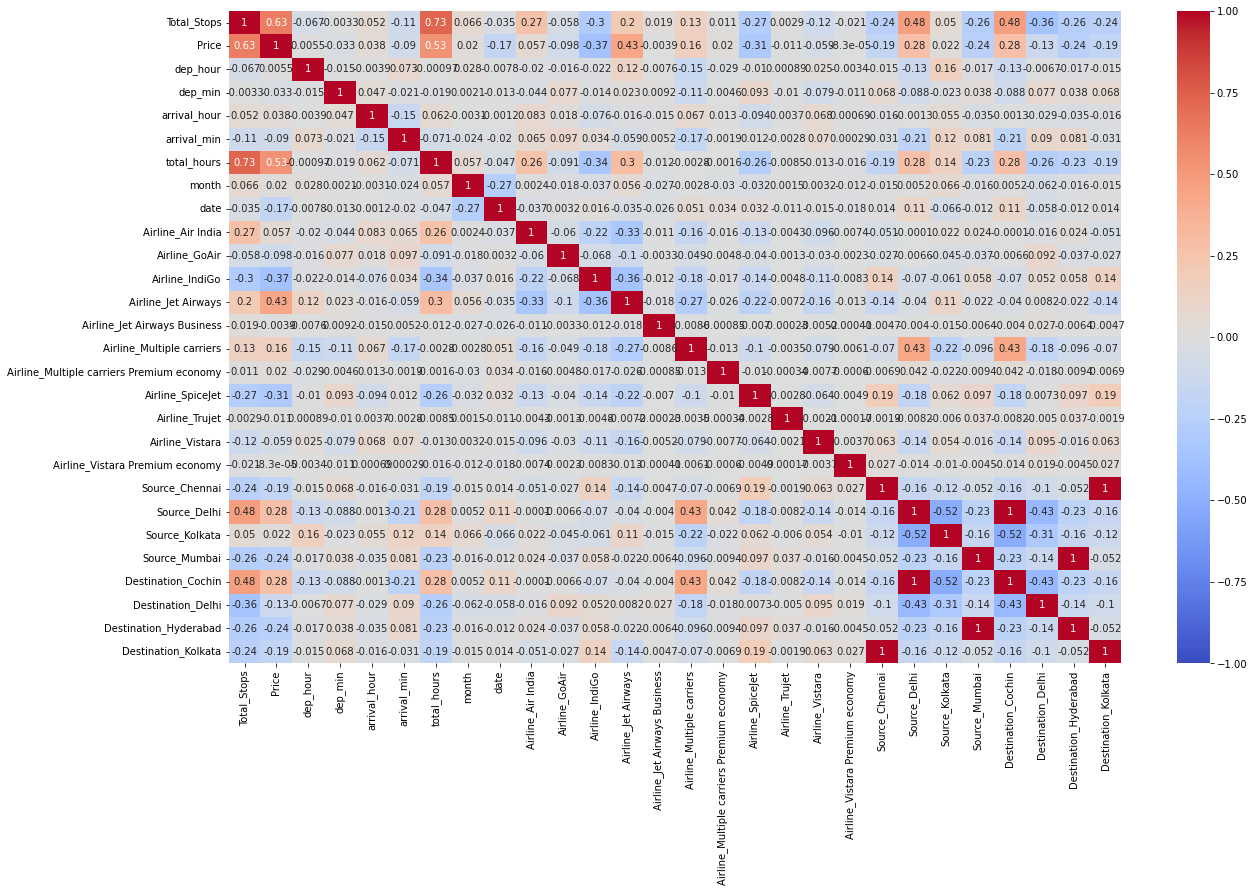

In [127]:

plt.figure(figsize= (20,12))
sns.heatmap(final_df.corr() , annot = True , cmap = 'coolwarm' , vmin = -1 , vmax = 1 , robust = True ) 

In [128]:
final_df.corr()['Price'].sort_values(ascending = False )[1:]

Total_Stops                                  0.627674
total_hours                                  0.532665
Airline_Jet Airways                          0.433802
Destination_Cochin                           0.279750
Source_Delhi                                 0.279750
Airline_Multiple carriers                    0.156851
Airline_Air India                            0.056779
arrival_hour                                 0.038111
Source_Kolkata                               0.022219
month                                        0.020392
Airline_Multiple carriers Premium economy    0.019542
dep_hour                                     0.005497
Airline_Vistara Premium economy             -0.000083
Airline_Jet Airways Business                -0.003913
Airline_Trujet                              -0.010776
dep_min                                     -0.032893
Airline_Vistara                             -0.058872
arrival_min                                 -0.090399
Airline_GoAir               

In [129]:
# dropping price columns
X = final_df.drop('Price' , 1 ) 
# standarization of price columns 
y = np.log1p(final_df['Price']) 

In [130]:
#train test split with 33% test values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [131]:
X_train.shape , X_test.shape 

((7008, 27), (3453, 27))

##  Model selection

In [132]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error


In [133]:
def model_feature(model):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    print(str(model)[0 : -2] + ' ' 'Model')
    print('r2_score:{}'.format(round(r2_score(y_test , y_pred) , 2)))
    print('MAE',round(mean_absolute_error(y_test , y_pred) , 2))
    print('MAPE' ,  round(mean_absolute_percentage_error(y_test , y_pred) , 2)) 
    print('MSE' , round(mean_squared_error(y_test , y_pred) , 2))

## LinearRegression

In [134]:
model_feature(LinearRegression()) 

LinearRegression Model
r2_score:0.69
MAE 0.21
MAPE 0.02
MSE 0.08


## Lasso

In [135]:
model_feature(Lasso()) 

Lasso Model
r2_score:0.31
MAE 0.34
MAPE 0.04
MSE 0.18


##  Ridge

In [136]:
model_feature(Ridge()) 

Ridge Model
r2_score:0.69
MAE 0.21
MAPE 0.02
MSE 0.08


## KNeighborsRegressor

In [137]:
model_feature(KNeighborsRegressor())

KNeighborsRegressor Model
r2_score:0.7
MAE 0.21
MAPE 0.02
MSE 0.08


## RandomForestRegressor

In [138]:
model_feature(RandomForestRegressor()) 

RandomForestRegressor Model
r2_score:0.86
MAE 0.13
MAPE 0.01
MSE 0.04


## GradientBoostingRegressor

In [139]:
model_feature(GradientBoostingRegressor())

GradientBoostingRegressor Model
r2_score:0.83
MAE 0.16
MAPE 0.02
MSE 0.04


## AdaBoostRegressor

In [140]:
model_feature(AdaBoostRegressor()) 

AdaBoostRegressor Model
r2_score:0.7
MAE 0.23
MAPE 0.03
MSE 0.08


## ExtraTreesRegressor

In [141]:
model_feature(ExtraTreesRegressor()) 

ExtraTreesRegressor Model
r2_score:0.82
MAE 0.14
MAPE 0.02
MSE 0.05


## VotingRegressor

In [142]:
from sklearn.ensemble import VotingRegressor,StackingRegressor


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
# xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3, max_features=0.75,max_depth=10)

model_vr = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('et',et)],weights=[5,1,1])

model_vr.fit(X_train,y_train)

y_pred = model_vr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8673892136000882
MAE 0.13143750539907256


## StackingRegressor

In [143]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
]

pipe = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred)) 

R2 score 0.8661491052277046
MAE 0.13739910412351694


## RandomForestRegressor

In [144]:
model_rfr = RandomForestRegressor() 
model_rfr.fit(X_train , y_train)
model_rfr.predict(X_test)
r2_score(y_test,y_pred)

0.8661491052277046

In [145]:
model_list = [LinearRegression() , Ridge() , Lasso() , KNeighborsRegressor() , DecisionTreeRegressor() , RandomForestRegressor() , GradientBoostingRegressor() , AdaBoostRegressor() , ExtraTreesRegressor() ]
model_list1 = []
R2_score = []
mae = [] 
mape = []
mse = []

for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test) 
    R2_score.append(round(r2_score(y_test , y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test , y_pred) , 2))
    mape.append(round(mean_absolute_percentage_error(y_test , y_pred) , 2))
    mse.append(round(mean_squared_error(y_test , y_pred) , 2))

In [74]:
dict = {'Model':model_list1, 'R2_score':R2_score , 'MAPE':mape , 'MAE':mae , 'MSE':mse}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'R2_score')
model_df 

,Model,R2_score,MAPE,MAE,MSE
5,RandomForestRegressor,0.86,0.01,0.13,0.04
6,GradientBoostingRegressor,0.83,0.02,0.16,0.04
8,ExtraTreesRegressor,0.82,0.02,0.14,0.05
4,DecisionTreeRegressor,0.77,0.02,0.15,0.06
7,AdaBoostRegressor,0.71,0.03,0.23,0.08
3,KNeighborsRegressor,0.70,0.02,0.21,0.08
0,LinearRegression,0.69,0.02,0.21,0.08
1,Ridge,0.69,0.02,0.21,0.08
2,Lasso,0.31,0.04,0.34,0.18


### Random Forest Regressor & XGB Regressor are giving Maximum Accuracy as compare to other Regressor algorithm.